In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import netCDF4
from erddapy import ERDDAP
import json

Configure the ERDDAP to search

In [98]:
ra = 'gcoos'

with open('utils/ra_erddaps.json') as f:
    urls = json.load(f)

server = urls[ra.lower()]

print(server)

e = ERDDAP(server=server, protocol="tabledap")

https://erddap.gcoos.org/erddap


Pull in the processed inventory

In [104]:
#
# df_cruise = df[df['Station Description'] == 'Chesapeake Bay WQ Cruise Data ']
#
#df_aws = df[df['Station ID'] == 'Humboldt']
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/OMOECC_E1/OMOECC_E1.ncml'
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/45186/45186.ncml'
# #url = 'http://tds.glos.us/thredds/dodsC/buoy_agg_standard/bgsusd2/bgsusd2.ncml'
# url = 'http://oos.soest.hawaii.edu/thredds/dodsC/hioos/nss/ns12agg'
# print(url)
# ds = xr.open_dataset(url)
# #ds = netCDF4.Dataset(url,'r')
# title = ds.title
# start_time = np.datetime_as_string(ds.time.min().values, unit='D')
# end_time = np.datetime_as_string(ds.time.max().values, unit='D')
# print('Duration: %s - %s' % (np.datetime_as_string(ds.time.min().values, unit='D'),
#                              np.datetime_as_string(ds.time.max().values, unit='D'))
#       )

# Try glos web server
# url = 'https://glbuoys.glos.us/tools/export?ftype=csv&data_type=buoy&units=eng&locs=OMOECC_E1&params=Water_Temperature_at_Surface|dissolved_oxygen_saturation|water_conductivity|ysi_turbidity&tperiod=custom&date_start=2020-01-01&date_end=2020-12-31&avg_ivld=none'
# df = erddapy.ERDDAP.to_pandas(url)

## using ERDDAP to look for stations
# check out http://data.glos.us/erddap/tabledap/allDatasets.htmlTable?datasetID%2Ctitle%2CminTime%2CmaxTime&maxTime%3E=2020-01-01&maxTime%3C=2020-12-31&orderBy(%22maxTime%22)
# that lists out all the GLOS stations with the maximum time of observations within the year 2020 (on their ERDDAP).

df = pd.read_excel('2021/data/processed/%s.xlsx' % ra.upper(), dtype=str)
df

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes
0,GCOOS,ioos:station:TCOON:076,NaN,"076: SALT05 (Nueces River, Texas): SALT05 (Nue...",url: http://lighthouse.tamucc.edu/overview/076,27.89183,-97.61045,fixed,< 5 yr,Y,Unknown,Yp,Texas Coastal Ocean Observation Network,academic,Texas Coastal Ocean Observation Network,Jonathan Scott Duff(Scott.Duff@tamucc.edu),"sea_water_temperature ,sea_water_practical_sal...",NaN
1,GCOOS,ioos:station:TCOON:042,NaN,042: Nueces Delta 2: Nueces Delta 2,url: http://lighthouse.tamucc.edu/overview/042,27.8888,-97.5696,fixed,< 5 yr,Y,Unknown,Yp,Texas Coastal Ocean Observation Network,academic,Texas Coastal Ocean Observation Network,Jonathan Scott Duff(Scott.Duff@tamucc.edu),"sea_water_temperature ,sea_water_practical_sal...",NaN
2,GCOOS,ioos:station:TCOON:043,NaN,043: Nueces Delta 3: Nueces Delta 3,url: http://lighthouse.tamucc.edu/overview/043,27.883783,-97.5332,fixed,< 5 yr,Y,Unknown,Yp,Texas Coastal Ocean Observation Network,academic,Texas Coastal Ocean Observation Network,Jonathan Scott Duff(Scott.Duff@tamucc.edu),"sea_water_temperature ,sea_water_practical_sal...",NaN
3,GCOOS,ioos:station:TCOON:079,NaN,079: SALT08: SALT08,url: http://lighthouse.tamucc.edu/overview/076,27.87078,-97.5177,fixed,< 5 yr,Y,Unknown,Yp,Texas Coastal Ocean Observation Network,academic,Texas Coastal Ocean Observation Network,Jonathan Scott Duff(Scott.Duff@tamucc.edu),"sea_water_temperature ,sea_water_practical_sal...",NaN
4,GCOOS,ioos:station:TCOON:074,NaN,"074: SALT03 (Nueces Bay, Texas): SALT03 (Nuece...",url: http://lighthouse.tamucc.edu/overview/074,27.85155,-97.48203,fixed,< 5 yr,Y,Unknown,Yp,Texas Coastal Ocean Observation Network,academic,Texas Coastal Ocean Observation Network,Jonathan Scott Duff(Scott.Duff@tamucc.edu),"sea_water_temperature ,sea_water_practical_sal...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,GCOOS,ioos:station:USF.COMPS:SHP,NaN,"SHP: Shell Point, FL",url: http://comps.marine.usf.edu/index?view=st...,30.06,-84.291,fixed,< 5 yr,Y,Unknown,N,Coastal Ocean Monitoring and Prediction System,academic,Coastal Ocean Monitoring and Prediction System,Mark E. Luther(mluther@usf.edu),"sea_surface_height_above_sea_level,wind_speed,...",NaN
99,GCOOS,ioos:station:USF.COMPS:C10,42013,C10: Navy-2,url: http://comps.marine.usf.edu/index?view=st...,27.169,-82.926,moored_buoy,< 5 yr,Y,Unknown,N,Coastal Ocean Monitoring and Prediction System,academic,Coastal Ocean Monitoring and Prediction System,Mark E. Luther(mluther@usf.edu),"sea_water_temperature,wind_speed, wind_to_dire...",NaN
100,GCOOS,ioos:station:USF.COMPS:FHP,NaN,"FHP: Fred Howard Park, FL",url: http://comps.marine.usf.edu/index?view=st...,28.153,-82.801,fixed,< 5 yr,Y,Unknown,N,Coastal Ocean Monitoring and Prediction System,academic,Coastal Ocean Monitoring and Prediction System,Mark E. Luther(mluther@usf.edu),"sea_surface_height_above_sea_level,sea_water_t...",NaN
101,GCOOS,ioos:station:USF.COMPS:ARP,NaN,"APK: Aripeka, FL",url: http://comps.marine.usf.edu/index?view=st...,28.433,-82.667,fixed,< 5 yr,Y,Unknown,N,Coastal Ocean Monitoring and Prediction System,academic,Coastal Ocean Monitoring and Prediction System,Mark E. Luther(mluther@usf.edu),"sea_surface_height_above_sea_level,wind_speed,...",NaN


Search the ERDDAP server for a single station of interest - more of a test

In [4]:
# df['Station ID'].loc[df['Station ID'].isna()] = df.loc[df['Station ID'].isna(),'Dataset ID']

# df['Station ID']

In [5]:
df_wf = df[df['Station ID'] == 'ioos:station:TCOON:076']

# for SCCOOS need to search for 'Station Long Name' as 'Station ID' is NA for most entries
search_for = df_wf['Station ID'].to_string()

search_url = e.get_search_url(search_for=search_for, response="csv")

try:
    resp = pd.read_csv(search_url)
    print(resp['Station ID'])
except:
    pass

Rip through all the datasets in the inventory and see if they exist on the RA erddap. Process checks the following order:

1. `Station ID`, then 
2. `Station Long Name`, then
3. `WMO ID or NWS/CMAN ID`

We first check if the value is `nan`. If so, we punt as that will return all datasets from the ERDDAP service.

In [105]:
not_found = []
found = dict()

for station in df['Station ID'].astype(str):
    
    if station == "nan":
        print("punting with station id = nan\n")
        not_found.append(station)
        continue
    
    try:
        search_url = e.get_search_url(search_for=station, response="csv")
        resp = pd.read_csv(search_url)
        print("Found \"%s\": %s" % (station,resp['Dataset ID'].values.tolist()))
        
        found[station] = {'Dataset ID': resp['Dataset ID'].values.tolist()}
        
    except:
        
        #not_found.append(station)
#        pass
        print('no dataset matching \"%s\"' % station)
        station_long_name = df.loc[df['Station ID'] == station,'Station Long Name'].values.tolist()[0]
        
        if station_long_name == "nan":
                print("punting with statopm long name = nan\n")
                not_found.append(station)
                continue
                
        try:
            print('searching \"station long name\" = \"%s\"' % station_long_name)
            search_url = e.get_search_url(search_for=station_long_name, response="csv")
            resp = pd.read_csv(search_url)
            print("Found \"%s\": %s" % (station_long_name,resp['Dataset ID'].values.tolist()))
            
            found[station] = {'Dataset ID': resp['Dataset ID'].values.tolist()}
            
        except:

            station_wmo = str(df.loc[df['Station ID'] == station,'WMO ID or NWS/CMAN ID'].values.tolist()[0])
            
            if station_wmo == "nan":
                print("punting with station_wmo = nan\n")
                not_found.append(station)
                continue
            
            try:
                print('searching \"WMO ID\" = \"%s\"' % station_wmo)
                search_url = e.get_search_url(search_for=station_wmo, response="csv")
                resp = pd.read_csv(search_url)
                print("Found \"%s\": %s" % (station_wmo,resp['Dataset ID'].values.tolist()))
                
                found[station] = {'Dataset ID': resp['Dataset ID'].values.tolist()}
                
            except:    
                not_found.append(station)
        
    print("\n")

no dataset matching "ioos:station:TCOON:076"
searching "station long name" = "076: SALT05 (Nueces River, Texas): SALT05 (Nueces River, Texas)"
punting with station_wmo = nan

no dataset matching "ioos:station:TCOON:042"
searching "station long name" = "042: Nueces Delta 2: Nueces Delta 2"
punting with station_wmo = nan

no dataset matching "ioos:station:TCOON:043"
searching "station long name" = "043: Nueces Delta 3: Nueces Delta 3"
punting with station_wmo = nan

no dataset matching "ioos:station:TCOON:079"
searching "station long name" = "079: SALT08: SALT08"
punting with station_wmo = nan

no dataset matching "ioos:station:TCOON:074"
searching "station long name" = "074: SALT03 (Nueces Bay, Texas): SALT03 (Nueces Bay, Texas)"
punting with station_wmo = nan

no dataset matching "ioos:station:TCOON:003"
searching "station long name" = "003: Rincon del San Jose (87778121): Rincon del San Jose; Potrero Lopeno SW, TX "
punting with station_wmo = nan

no dataset matching "ioos:station:TCO

searching "WMO ID" = "42857"


no dataset matching "ioos:station:wmo:42869"
searching "station long name" = "42869 - Ocean Confidence - Mississippi Canyon 305 #2"
Found "42869 - Ocean Confidence - Mississippi Canyon 305 #2": ['wmo_42869']


no dataset matching "ioos:station:wmo:42873"
searching "station long name" = "42873 - Pontus - GB341"
Found "42873 - Pontus - GB341": ['wmo_42873']


no dataset matching "ioos:station:wmo:42874"
searching "station long name" = "42874 - Deepwater Asgard - Atwater Valley 23"
Found "42874 - Deepwater Asgard - Atwater Valley 23": ['wmo_42874']


no dataset matching "ioos:station:wmo:42879"
searching "station long name" = "42879 - Ocean BlackRhino - GC512"
Found "42879 - Ocean BlackRhino - GC512": ['wmo_42879']


no dataset matching "ioos:station:wmo:42880"
searching "station long name" = "42880 - West Auriga - Green Canyon 824"
searching "WMO ID" = "42880"
Found "42880": ['wmo_42880']


no dataset matching "ioos:station:wmo:42882"
searching "station lon

searching "WMO ID" = "42022"
Found "42022": ['USF_COMPS_C12']


no dataset matching "ioos:station:USF.COMPS:C13"
searching "station long name" = "C13: West Florida South Buoy"
searching "WMO ID" = "42023"
Found "42023": ['USF_COMPS_C13']


no dataset matching "ioos:station:USF.COMPS:SHP"
searching "station long name" = "SHP: Shell Point, FL"
punting with station_wmo = nan

no dataset matching "ioos:station:USF.COMPS:C10"
searching "station long name" = "C10: Navy-2"
searching "WMO ID" = "42013"
Found "42013": ['USF_COMPS_C10']


no dataset matching "ioos:station:USF.COMPS:FHP"
searching "station long name" = "FHP: Fred Howard Park, FL"
punting with station_wmo = nan

no dataset matching "ioos:station:USF.COMPS:ARP"
searching "station long name" = "APK: Aripeka, FL"
punting with station_wmo = nan

no dataset matching "ioos:station:USF.COMPS:BGC"
searching "station long name" = "BCP: Big Carlos Pass, FL"
punting with station_wmo = nan



Print the stations that we couldn't find.

In [106]:
len(not_found)

42

In [107]:
len(found)

61

In [108]:
df.loc[df['Station ID'].isna()]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes


In [109]:
df[df['Station ID'].isin(not_found)]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude (dec deg),Longitude (dec deg),Platform Type,"Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)","Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,"Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].",Additional notes
0,GCOOS,ioos:station:TCOON:076,NaN,"076: SALT05 (Nueces River, Texas): SALT05 (Nue...",url: http://lighthouse.tamucc.edu/overview/076,27.89183,-97.61045,fixed,< 5 yr,Y,Unknown,Yp,Texas Coastal Ocean Observation Network,academic,Texas Coastal Ocean Observation Network,Jonathan Scott Duff(Scott.Duff@tamucc.edu),"sea_water_temperature ,sea_water_practical_sal...",NaN
1,GCOOS,ioos:station:TCOON:042,NaN,042: Nueces Delta 2: Nueces Delta 2,url: http://lighthouse.tamucc.edu/overview/042,27.8888,-97.5696,fixed,< 5 yr,Y,Unknown,Yp,Texas Coastal Ocean Observation Network,academic,Texas Coastal Ocean Observation Network,Jonathan Scott Duff(Scott.Duff@tamucc.edu),"sea_water_temperature ,sea_water_practical_sal...",NaN
2,GCOOS,ioos:station:TCOON:043,NaN,043: Nueces Delta 3: Nueces Delta 3,url: http://lighthouse.tamucc.edu/overview/043,27.883783,-97.5332,fixed,< 5 yr,Y,Unknown,Yp,Texas Coastal Ocean Observation Network,academic,Texas Coastal Ocean Observation Network,Jonathan Scott Duff(Scott.Duff@tamucc.edu),"sea_water_temperature ,sea_water_practical_sal...",NaN
3,GCOOS,ioos:station:TCOON:079,NaN,079: SALT08: SALT08,url: http://lighthouse.tamucc.edu/overview/076,27.87078,-97.5177,fixed,< 5 yr,Y,Unknown,Yp,Texas Coastal Ocean Observation Network,academic,Texas Coastal Ocean Observation Network,Jonathan Scott Duff(Scott.Duff@tamucc.edu),"sea_water_temperature ,sea_water_practical_sal...",NaN
4,GCOOS,ioos:station:TCOON:074,NaN,"074: SALT03 (Nueces Bay, Texas): SALT03 (Nuece...",url: http://lighthouse.tamucc.edu/overview/074,27.85155,-97.48203,fixed,< 5 yr,Y,Unknown,Yp,Texas Coastal Ocean Observation Network,academic,Texas Coastal Ocean Observation Network,Jonathan Scott Duff(Scott.Duff@tamucc.edu),"sea_water_temperature ,sea_water_practical_sal...",NaN
5,GCOOS,ioos:station:TCOON:003,NaN,003: Rincon del San Jose (87778121): Rincon de...,url: http://lighthouse.tamucc.edu/overview/003,26.8015,-97.4706,tide_station,< 5 yr,Y,Unknown,Yp,Texas Coastal Ocean Observation Network,academic,Texas Coastal Ocean Observation Network,Jonathan Scott Duff(Scott.Duff@tamucc.edu),"sea_surface_height_above_sea_level ,sea_water_...",NaN
6,GCOOS,ioos:station:TCOON:072,NaN,"072: SALT01 (Nueces Bay, Texas): SALT01 (Nuece...",url: http://lighthouse.tamucc.edu/overview/072,27.839194,-97.443972,fixed,< 5 yr,Y,Unknown,Yp,Texas Coastal Ocean Observation Network,academic,Texas Coastal Ocean Observation Network,Jonathan Scott Duff(Scott.Duff@tamucc.edu),"sea_water_temperature ,sea_water_practical_sal...",NaN
7,GCOOS,ioos:station:TCOON:170,NaN,170: National Park Service - Baffin Bay: Natio...,url: http://lighthouse.tamucc.edu/overview/170,27.29702,-97.40491,fixed,< 5 yr,Y,Unknown,Yp,Texas Coastal Ocean Observation Network,gov_federal,Texas Coastal Ocean Observation Network,Jonathan Scott Duff(Scott.Duff@tamucc.edu),"sea_water_temperature ,sea_water_practical_sal...",NaN
8,GCOOS,ioos:station:TCOON:068,NaN,068: Baffin Bay (87766041): Baffin Bay; Point ...,url: http://lighthouse.tamucc.edu/overview/068,27.297,-97.4049,tide_station,< 5 yr,Y,Unknown,Yp,Texas Coastal Ocean Observation Network,academic,Texas Coastal Ocean Observation Network,Jonathan Scott Duff(Scott.Duff@tamucc.edu),"sea_surface_height_above_sea_level ,sea_water_...",NaN
9,GCOOS,ioos:station:TCOON:013,NaN,013: S. Bird Island (87761391): South Bird Isl...,url: http://lighthouse.tamucc.edu/overview/013,27.4847,-97.3181,tide_station,< 5 yr,Y,Unknown,Yp,Texas Coastal Ocean Observation Network,academic,Texas Coastal Ocean Observatio

In [110]:
#found.pop('HTLPWES')
found

{'ioos:station:wmo:42370': {'Dataset ID': ['wmo_42370']},
 'ioos:station:wmo:42377': {'Dataset ID': ['wmo_42377']},
 'ioos:station:wmo:42363': {'Dataset ID': ['wmo_42363']},
 'ioos:station:wmo:42365': {'Dataset ID': ['wmo_42365']},
 'ioos:station:wmo:42382': {'Dataset ID': ['wmo_42382']},
 'ioos:station:wmo:42383': {'Dataset ID': ['wmo_42383']},
 'ioos:station:wmo:42385': {'Dataset ID': ['wmo_42385']},
 'ioos:station:wmo:42386': {'Dataset ID': ['wmo_42386']},
 'ioos:station:wmo:42887': {'Dataset ID': ['wmo_42887']},
 'ioos:station:wmo:42917': {'Dataset ID': ['wmo_42917']},
 'ioos:station:wmo:42902': {'Dataset ID': ['wmo_42902']},
 'ioos:station:wmo:42374': {'Dataset ID': ['wmo_42374']},
 'ioos:station:wmo:42379': {'Dataset ID': ['wmo_42379']},
 'ioos:station:wmo:42390': {'Dataset ID': ['wmo_42390']},
 'ioos:station:wmo:42395': {'Dataset ID': ['wmo_42395']},
 'ioos:station:wmo:42865': {'Dataset ID': ['wmo_42865']},
 'ioos:station:wmo:42901': {'Dataset ID': ['wmo_42901']},
 'ioos:station

Check if the dataset has coverage for CY 2021

In [111]:
valid_datasets = []

for key in found:
    
    dataset_id = found[key]['Dataset ID']
    
    if len(dataset_id)>1:
        
        for dataset in dataset_id:
            
            e.dataset_id = dataset
    
            e.constraints = {
                 "time>=": "2021-01-01"
            }
        
            e.variables = ['time']
    
            try:
                df_data = e.to_pandas(parse_dates=True)
                valid_datasets.extend([key])
                
            except:
                pass

                #print("No data for 2021 for %s: dataset ID %s" % (key,e.dataset_id))

    else:
        
        e.dataset_id = dataset_id[0]
    
        e.constraints = {
                         "time>=": "2021-01-01"
                        }
        
        e.variables = ['time']
        
        try:
            
            df_data = e.to_pandas(parse_dates=True)

            valid_datasets.extend([key])

        except:
            pass

            #print("No data for 2021 for %s: dataset ID %s" % (key,e.dataset_id))

            
#for valid in sorted(set(valid_datasets)):
    
#     # drop qc vars
#     cols = [c for c in df_data.columns if 'qc' not in c]
#     cols = [c for c in cols if 'QARTOD' not in c]

#     df_data = df_data[cols]

#     # set index for plotting
#     df_data = df_data.set_index(df_data['time (UTC)'])

#     # plot
#     #df_data.plot(subplots=True, title=e.dataset_id,figsize=(20,20))

#     start_time = df_data['time (UTC)'].min()
#     end_time = df_data['time (UTC)'].max()

#     print('Dataset %s' % e.dataset_id)
#     print('Duration: %s - %s' % (start_time, end_time))

non_2021_datasets = found.keys() - sorted(set(valid_datasets))

print('Datasets without coverage for 2021:\n%s' % non_2021_datasets)

Datasets without coverage for 2021:
{'ioos:station:wmo:42869', 'ioos:station:wmo:42935', 'ioos:station:wmo:42047', 'ioos:station:wmo:42924', 'ioos:station:wmo:42903', 'ioos:station:wmo:42879', 'ioos:station:wmo:42365', 'ioos:station:wmo:42936'}


Show me the inventory metadata about the invalid stations:

In [112]:
bad_stations = df.loc[(df['Station ID'].isin(non_2021_datasets)) | df['Station ID'].isin(not_found)]

df['erddap_not_avail'] = df['Station ID'].isin(bad_stations['Station ID'])

In [113]:
df['erddap_not_avail']

0       True
1       True
2       True
3       True
4       True
       ...  
98      True
99     False
100     True
101     True
102     True
Name: erddap_not_avail, Length: 103, dtype: bool

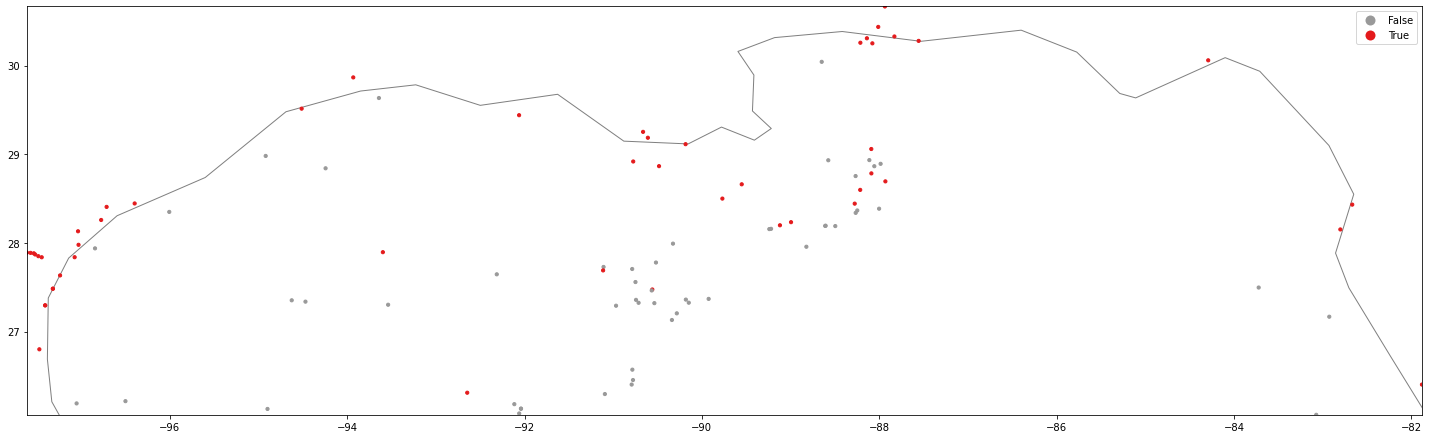

In [114]:
import geopandas
import matplotlib.pyplot as plt

#df = df.loc[df['']]

df.rename(columns=
{'Variable Names + water column depth of measurement in meters [CF_name (# m, # m) or CF_name (mult) or CF_name (# depths)].':
     'Variable Names',
 'Station Deployment (mm/yyyy, yyyy, < 5 yr, > 5 yr)': 'Station Deployment',
 'Longitude (dec deg)': 'Longitude',
 'Latitude (dec deg)': 'Latitude'},
              inplace=True)

df['Station Deployment'] = \
    df['Station Deployment'].astype(str)


gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df['Longitude'], df['Latitude']))

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

ax = world.plot(
    color='white', 
    edgecolor='grey', 
    figsize=(25,20),
    )

gdf.plot( ax=ax,
         column='erddap_not_avail', 
         categorical=True, 
         cmap = 'Set1_r',
         markersize=10, 
         legend=True,
         k=2,
        )



minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

plt.show()

In [115]:
gdf_final = gdf.set_crs(epsg=4326)

gdf_final.explore('erddap_not_avail',cmap = 'Set1_r',)

In [116]:
gdf_final.loc[gdf_final['geometry'].is_empty == True]

,RA,Station ID,WMO ID or NWS/CMAN ID,Station Long Name,Station Description,Latitude,Longitude,Platform Type,Station Deployment,"Currently Operational? (Y, N, O, U)",Platform Funder/Sponsor,"RA Funding Involvement (Yf, Yp, N)",Platform Operator/Owner,Operator Sector,Platform Maintainer,Data Manager,Variable Names,Additional notes,erddap_not_avail,geometry


In [97]:
import urllib.request
for url in gdf_final.loc[gdf_final['erddap_not_avail'],'Station Description'].str.replace('url: ',''):
    print(url)
    try:
        urllib.request.urlopen(url).getcode()
    except:
        print("URL broken: %s" % url)
        print(gdf_final.loc[gdf_final['Station Description'].str.contains(url,regex=False),'Station ID'])

URL broken: http://lighthouse.tamucc.edu/overview/074
4    ioos:station:TCOON:074
Name: Station ID, dtype: object
URL broken: http://wavcis.csi.lsu.edu/
33    ioos:station:WAVCIS:CSI15
35    ioos:station:WAVCIS:CSI09
37    ioos:station:WAVCIS:CSI16
Name: Station ID, dtype: object
URL broken: http://wavcis.csi.lsu.edu/
33    ioos:station:WAVCIS:CSI15
35    ioos:station:WAVCIS:CSI09
37    ioos:station:WAVCIS:CSI16
Name: Station ID, dtype: object
URL broken: http://wavcis.csi.lsu.edu/
33    ioos:station:WAVCIS:CSI15
35    ioos:station:WAVCIS:CSI09
37    ioos:station:WAVCIS:CSI16
Name: Station ID, dtype: object
URL broken: http://www.mymobilebay.com/stationdata/StationInfo.asp?jday=&property=&chartyear=&StationID=607
45    ioos:station:DISL:KATA
Name: Station ID, dtype: object
URL broken: http://www.mymobilebay.com/stationdata/StationInfo.asp?jday=&property=&chartyear=&StationID=830
46    ioos:station:DISL:CATA
Name: Station ID, dtype: object
URL broken: http://www.mymobilebay.com/stationd

URL broken: http://www.ndbc.noaa.gov/station_page.php?station=42852
120    ioos:station:wmo:42852
Name: Station ID, dtype: object
URL broken: https://www.ndbc.noaa.gov/station_page.php?station=42367
123    ioos:station:wmo:42367
Name: Station ID, dtype: object
URL broken: https://www.ndbc.noaa.gov/station_page.php?station=42371
125    ioos:station:wmo:42371
Name: Station ID, dtype: object
URL broken: https://www.ndbc.noaa.gov/station_page.php?station=42376
128    ioos:station:wmo:42376
Name: Station ID, dtype: object
URL broken: https://www.ndbc.noaa.gov/station_page.php?station=42393
130    ioos:station:wmo:42393
Name: Station ID, dtype: object
URL broken: https://www.ndbc.noaa.gov/station_page.php?station=42396
132    ioos:station:wmo:42396
Name: Station ID, dtype: object
URL broken: https://www.ndbc.noaa.gov/station_page.php?station=42853
137    ioos:station:wmo:42853
Name: Station ID, dtype: object
URL broken: https://www.ndbc.noaa.gov/station_page.php?station=42854
138    ioos:sta

In [19]:
df.shape

(194, 20)

In [96]:
gdf_final.loc[gdf_final['erddap_not_avail'],'Station Description'].str.replace('url: ','')

0              http://lighthouse.tamucc.edu/overview/076
1              http://lighthouse.tamucc.edu/overview/042
2              http://lighthouse.tamucc.edu/overview/043
3              http://lighthouse.tamucc.edu/overview/076
4              http://lighthouse.tamucc.edu/overview/074
                             ...                        
187    https://www.ndbc.noaa.gov/station_page.php?sta...
188    https://www.ndbc.noaa.gov/station_page.php?sta...
189    http://www.ndbc.noaa.gov/station_page.php?stat...
191    http://www.ndbc.noaa.gov/station_page.php?stat...
193    http://ndbc.noaa.gov/station_page.php?station=...
Name: Station Description, Length: 139, dtype: object

In [90]:
gdf_final.loc[gdf_final['Station Description'].str.contains('http://ndbc.noaa.gov/station_page.php?station=42365',regex=False),'Station ID']

193    ioos:station:wmo:42365
Name: Station ID, dtype: object

In [63]:
gdf_final['Station Description'].astype(str)

0         url: http://lighthouse.tamucc.edu/overview/076
1         url: http://lighthouse.tamucc.edu/overview/042
2         url: http://lighthouse.tamucc.edu/overview/043
3         url: http://lighthouse.tamucc.edu/overview/076
4         url: http://lighthouse.tamucc.edu/overview/074
                             ...                        
189    url: http://www.ndbc.noaa.gov/station_page.php...
190    url: http://ndbc.noaa.gov/station_page.php?sta...
191    url: http://www.ndbc.noaa.gov/station_page.php...
192    url: http://www.ndbc.noaa.gov/station_page.php...
193    url: http://ndbc.noaa.gov/station_page.php?sta...
Name: Station Description, Length: 194, dtype: object